In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
from Function import *

#klappt für:
#"C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\Videos\\muc_bhf_4.mp4"
#"C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\Videos\\muc_bhf_5.mp4"
#"C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\Videos\\muc_bhf_3.mp4"
#"C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\Videos\muc_bhf_1.mp4"
#"C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\Videos\kempten1.mp4"

#klappt nicht mit:
#"C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\Videos\kempten2.mp4", da Querbild mit sehr viel Spielegnden Flächen links und rechts

video_path = "C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\Videos\\muc_bhf_3.mp4"
frames = read_video_frames(video_path)
print(len(frames))

#frames1 = frames[200:400]

1309


In [2]:
frames1 = frames[0:500]

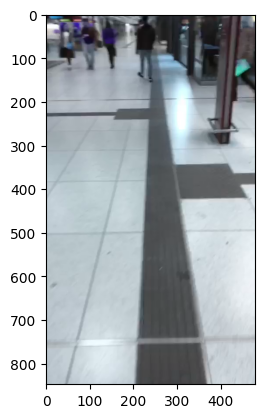

In [3]:
img = frames1[300][1]
plt.imshow(img)

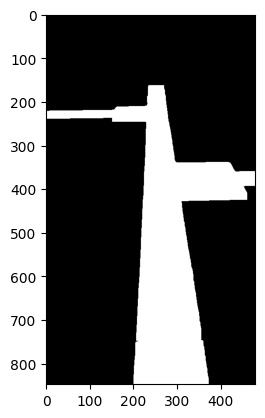

In [4]:
color = "B"
img_lines_seg = seg_orientation_lines(img, color)

plt.imshow(img_lines_seg)

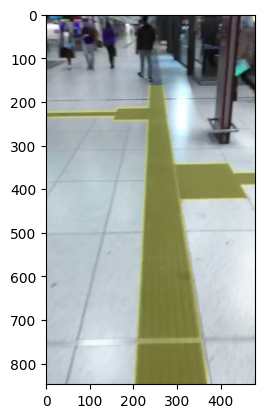

In [5]:
img_lines_mraked = draw_seg_orientationline(img, img_lines_seg)
plt.imshow(img_lines_mraked)

In [235]:
white_pixels = cv2.countNonZero(img_lines_seg)
print(white_pixels)

357071


848


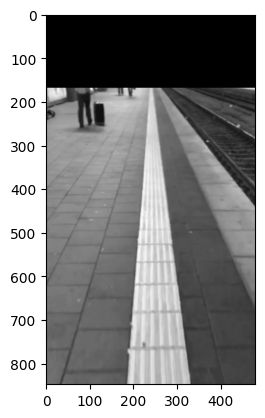

In [21]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.gray()

#plt.imshow(gray_image)

img_blur = cv2.GaussianBlur(gray_image, (5,5), 0)

Farbe = "W"   #Farbe der Orientierungslinie wählen: w für weiß und s für schwarz

img_b_or_w = white_or_black(img_blur, Farbe)

#Oberes vietrl des Bildes schwärzen
h = img_b_or_w.shape[0]
print(h)
region = 1/5
top_region = img_b_or_w[0:int(h*region), :]  # Obere 1/4 des Bildes auswählen

# Schwärze den ausgewählten Bereich
top_region = np.zeros_like(top_region)

# Füge den geschwärzten Bereich wieder in das ursprüngliche Bild ein
img_b_or_w[0:int(h*region), :] = top_region

plt.imshow(img_b_or_w)

[130, 130, 130, 130, 130, 130, 129, 129, 129, 129, 129, 129, 129, 129, 128, 128, 128, 128, 128, 128, 128, 129, 129, 130, 131, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132, 129, 122, 115, 112, 114, 119, 124, 127, 129, 130, 131, 131, 131, 131, 130, 130, 130, 130, 130, 130, 130, 129, 129, 129, 130, 130, 130, 131, 131, 132, 133, 133, 134, 134, 133, 133, 133, 133, 133, 133, 133, 134, 135, 136, 136, 136, 136, 135, 135, 134, 134, 133, 134, 134, 134, 134, 134, 135, 135, 134, 132, 128, 120, 111, 108, 109, 115, 119, 122, 122, 122, 121, 121, 121, 121, 122, 122, 123, 124, 124, 124, 124, 124, 124, 124, 124, 124, 123, 123, 122, 122, 122, 123, 124, 125, 127, 128, 128, 128, 127, 127, 126, 125, 125, 124, 123, 123, 123, 123, 123, 123, 122, 122, 122, 122, 121, 121, 121, 120, 120, 118, 112, 105, 105, 114, 124, 130, 132, 131, 131, 131, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 129, 129, 129, 128, 127, 126, 125, 125, 125, 125, 125, 125, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 123,

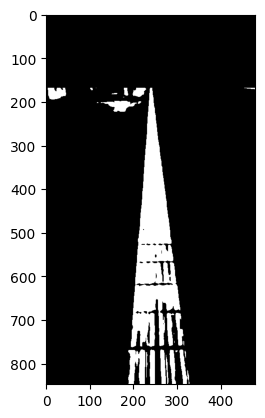

In [22]:
thresh_1, thresh_2 = find_thresh(img_b_or_w, 0.2)

print("1:", thresh_1)
print("2:", thresh_2)

t, seg = cv2.threshold(img_b_or_w,thresh_2,255,cv2.THRESH_BINARY)
plt.imshow(seg)
print(seg.dtype)

In [41]:
white_pixels = cv2.countNonZero(seg)
print(white_pixels)

19044


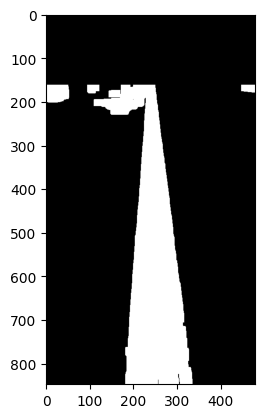

In [23]:
bw_new = cv2.dilate(seg.astype('uint8'), np.ones((3,3)), iterations=7)
plt.imshow(bw_new)

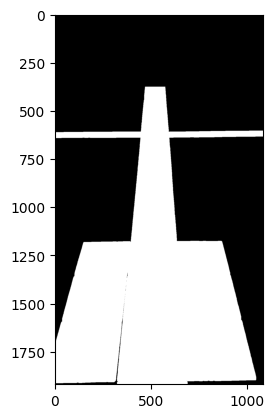

In [23]:
img_largest = find_largest_component(bw_new)
plt.imshow(img_largest)

In [44]:
white_pixels = cv2.countNonZero(img_largest)
print(white_pixels)

26415


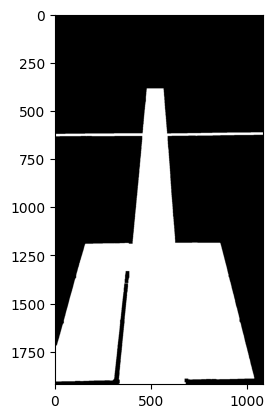

In [25]:
iteration=9
bw_new2 = cv2.erode(img_largest.astype('uint8'), np.ones((3,3)), iterations=iteration)
plt.imshow(bw_new2)

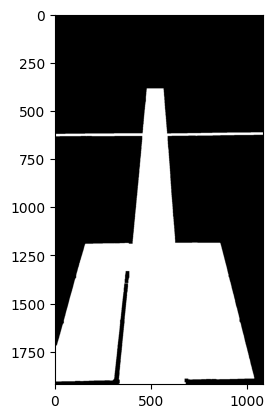

In [26]:

img_largest = find_largest_component(bw_new2)
plt.imshow(img_largest)

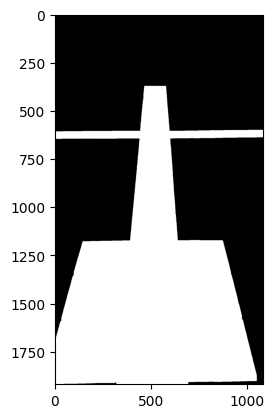

In [27]:
bw_new3 = cv2.dilate(img_largest.astype('uint8'), np.ones((3,3)), iterations=int(iteration*1.5))
plt.imshow(bw_new3)

848
[25, 25, 25, 25, 26, 27, 28, 28, 29, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 29, 30, 31, 30, 29, 27, 26, 31, 49, 69, 74, 57, 37, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 30, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 34, 34, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 34, 34, 34, 34, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 32, 30, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 27, 27, 27, 27, 26, 24, 22, 21, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 23, 34, 65, 109, 141, 152, 155, 163, 172, 176, 172, 165, 164, 166, 166, 165, 164, 167, 174, 178, 176, 167, 159, 160, 164, 167, 167, 167, 169, 172, 174, 170, 164, 162, 166, 168, 16

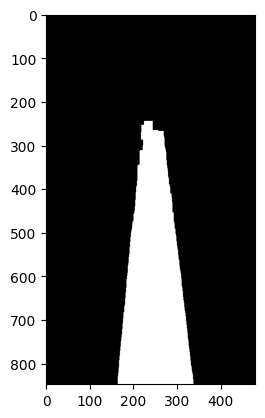

In [13]:
color = "B"
img_lines_seg = seg_orientation_lines(img, color, 0.18)

plt.imshow(img_lines_seg)

In [ ]:
#Notes:

#Bei schwarzen Orientierungslinien bei muc_bhf_3 thresh_1 besser als 2 und percentage eher bei 0.185...
#[300]: 0.22
#[380]: 0.159 gut, 17 okay
#[430]: 0.165 gut
#[499]: 0.18 gut drüber fehlerhaft
#[550]: 0.176 gut drüber falsch
#[600]-[630]: immer fehlerhaft
#[690]: 0.165: wieder besser, aber nicht top
#[730]: 0.165: top


2329


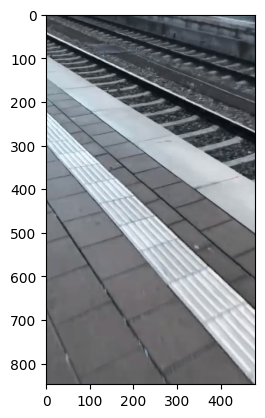

In [38]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from tools import *
import sys
import pyttsx3 
plt.gray()

video_path = "C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\Videos\\muc_bhf_7.mp4"
frames = read_video_frames(video_path)
print(len(frames))

frames1 = frames[0:600]

img = frames1[115][1]
plt.imshow(img)



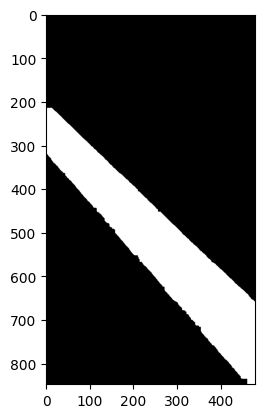

In [39]:
img_cont = seg_orientation_lines(img, str("W"))

plt.imshow(img_cont)

848
[359, 138]


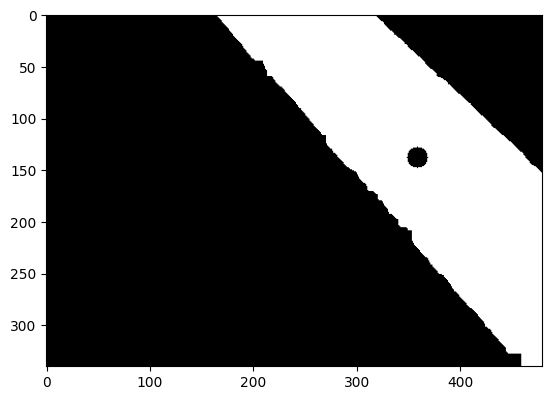

In [40]:
 # get sizes of the frame 
frame_height = img.shape[0]
frame_width = img.shape[1]

# cut picture to find two center points to draw the line
cut = int(3/5 * frame_height)
black_up = img_cont[:cut,:]
black_down = img_cont[cut:,:]

#find center of both halfs
c_black_up, koords_up = find_center_plot(black_up)
c_black_down, koords_down = find_center_plot(black_down)

print(frame_height)
print(koords_down)
plt.imshow(c_black_down)

In [42]:
def nearest_line(koords, seg_image):
    '''
        Looks for the section in which the koords are located,
        allowing us to determine if we are already on the orientation line
        or if the nearest line is to the left or right of us.

        Args: 
            koords: Koordinates of the segmentated center of the lower section
            seg_image: The segmented image of the orientation line.

        Output: None for "On line" , 111 for "nearest line is left" or 222 for "nearest line is rigth"
    '''
    white_pixels = []
    h = seg_image.shape[0]
    w = seg_image.shape[1]

    for y in range(h-10,h,1):
        for x in range(w):
            if seg_image[y][x] == 255:  # 255 represents white pixels, 0 represents black pixels
                white_pixels.append(1)

    if len(white_pixels) <= 210:   # when True possibility is heigh, that the line comes from on sid into the picture
        x_value = koords[0]
        sections = w*(1/7)

        if 2*sections < x_value < 5*sections:
            return
        else:
            if x_value <= 2*sections:
                location = "nearset line is left"

            if x_value >= 5*sections:
                location = "nearest line is right"

        return location
    
    else:
        return 

current_location = nearest_line(koords_down, img_cont)
print (current_location)
    


480 848
200
nearest line is right


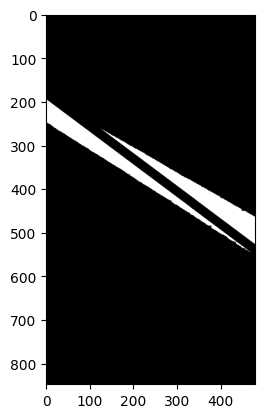

In [17]:
#concatenate both halfs two full picture again
frame_show = img.copy()

c_new = np.concatenate((c_black_up, c_black_down))
# make line through middle 
koords = calc_line_koords(koords_up[0], koords_up[1], koords_down[0], koords_down[1]+cut, [0,frame_height])
img_line = cv2.line(c_new, koords[0], koords[1], [0,0,0], 20)
frame_show = cv2.line(frame_show, koords[0], koords[1], [0,0,0], 20)
canny = cv2.Canny(img_line, 0, 0)
img_cut = img_line.copy() 

plt.imshow(img_line)

In [ ]:

while True:
    line_color = input("Please enter the color of the line. Choose between black(b) or white(w): ").upper()
    
    if line_color == "W" or line_color == "B":
        print("You did a great Job!")
        break  # Exit the loop if the input is correct
    else:
        print("Are you serious?")

# declare some list and start values which are needed
counter = 0 
save_cnts = 0
wait = 0
output = []
dist = [0]
koords = []
only_straight = []
res_text = "start"
# Read and process the video frames
while video.isOpened():
    # Read a single frame
    ret, frame = video.read()
    frame_show = frame.copy()
    # Check if the frame was successfully read
    if not ret:
        break
    
    # get sizes of the frame 
    frame_height = frame.shape[0]
    frame_width = frame.shape[1]

    # segmentation of the frame, to get black and white picture with the lines
    img_cont = seg_orientation_lines(frame, str(line_color))
    # TODO make input for the user
    # cut picture to find two center points to draw the line 
    cut = int(3/5 * frame_height)
    black_up = img_cont[:cut,:]
    black_down = img_cont[cut:,:]

    #find center of both halfs
    c_black_up, koords_up = find_center_plot(black_up)
    c_black_down, koords_down = find_center_plot(black_down)